In [1]:
# !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data reading 

In [3]:
big_mart_train = pd.read_csv("Data/Train.csv")
big_mart_train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.016047,0.019278,0.01676,0.0,0.0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [4]:
big_mart_test = pd.read_csv("Data/Test.csv")
big_mart_test.head().T

,0,1,2,3,4
Item_Identifier,FDW58,FDW14,NCN55,FDQ58,FDY38
Item_Weight,20.75,8.3,14.6,7.315,NaN
Item_Fat_Content,Low Fat,reg,Low Fat,Low Fat,Regular
Item_Visibility,0.007565,0.038428,0.099575,0.015388,0.118599
Item_Type,Snack Foods,Dairy,Others,Snack Foods,Dairy
Item_MRP,107.8622,87.3198,241.7538,155.034,234.23
Outlet_Identifier,OUT049,OUT017,OUT010,OUT017,OUT027
Outlet_Establishment_Year,1999,2007,1998,2007,1985
Outlet_Size,Medium,NaN,NaN,NaN,Medium
Outlet_Location_Type,Tier 1,Tier 2,Tier 3,Tier 2,Tier 3


In [5]:
#Concating the test and train data and checking their shape
big_mart_train['source']='train'
big_mart_test['source']='test'
data = pd.concat([big_mart_train, big_mart_test],ignore_index=True, sort=False)
big_mart_train.shape, big_mart_test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

## Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [7]:
# Checking the missing value 
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [8]:
# Getting information about data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Checking unique value
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [10]:
data.columns[data.isna().any()]

Index(['Item_Weight', 'Outlet_Size', 'Item_Outlet_Sales'], dtype='object')

In [11]:
big_mart_train.columns[big_mart_train.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [12]:
big_mart_test.columns[big_mart_test.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

## Data cleaning

In [13]:
# !pip install seaborn

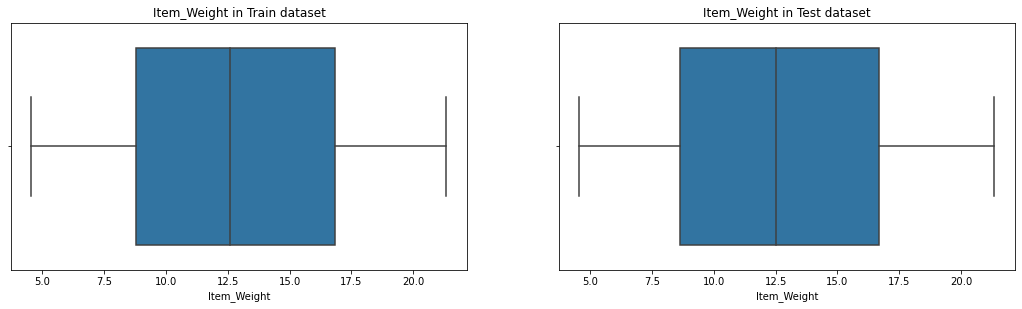

In [14]:
import seaborn as sns
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.title('Item_Weight in Train dataset')
sns.boxplot(x='Item_Weight', data=big_mart_train)

plt.subplot(2,2,2)
plt.title('Item_Weight in Test dataset')
sns.boxplot(x='Item_Weight', data=big_mart_test)

plt.show()

There is no outliers in both train and test data.

In [15]:
# Use the mean to replace the null values in Item_Weight feature
big_mart_train.Item_Weight = big_mart_train.Item_Weight.fillna(big_mart_train.Item_Weight.mean())
big_mart_test.Item_Weight = big_mart_test.Item_Weight.fillna(big_mart_test.Item_Weight.mean())

In [16]:
big_mart_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

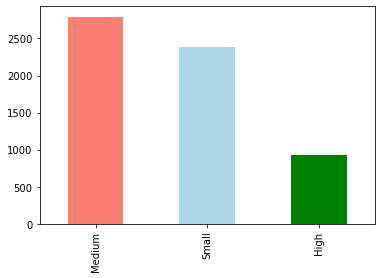

In [17]:
big_mart_train['Outlet_Size'].value_counts().plot(kind="bar", color=["salmon", "lightblue", "green"]);

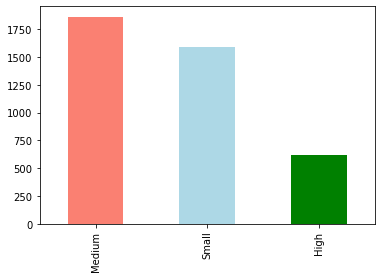

In [18]:
big_mart_test['Outlet_Size'].value_counts().plot(kind="bar", color=["salmon", "lightblue", "green"]);

In [19]:
big_mart_train.Outlet_Size = big_mart_train.Outlet_Size.fillna(big_mart_train.Outlet_Size.mode()[0])
big_mart_test.Outlet_Size = big_mart_test.Outlet_Size.fillna(big_mart_test.Outlet_Size.mode()[0])

In [20]:
big_mart_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [21]:
big_mart_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
source                       0
dtype: int64

In [22]:
big_mart_train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
source                          1
dtype: int64

In [23]:
big_mart_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
big_mart_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them!
for example there is low fat one with upper case and other with lower case and another abbreviated (LF)
also Regular and reg
so we have 2 types of item fat content Low fat and regular

In [25]:
big_mart_train['Item_Fat_Content'] = big_mart_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                                                                value=['Low Fat','Low Fat', 'Regular'])

In [26]:
big_mart_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
big_mart_test['Item_Fat_Content'] = big_mart_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], value=['Low Fat',
                                                                                                               'Low Fat', 'Regular'])


big_mart_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

## Visualizing to make it clear

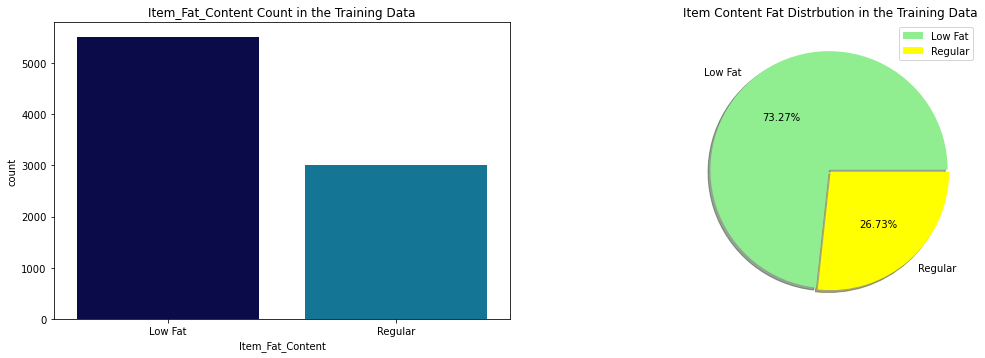

In [28]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Item_Fat_Content Count in the Training Data")
sns.countplot(x='Item_Fat_Content', data=big_mart_train, palette='ocean')

plt.subplot(2,2,2)
low_fat = big_mart_train.Item_Fat_Content[big_mart_train.Item_Fat_Content == 'Low Fat'].count()
reg = big_mart_test.Item_Fat_Content[big_mart_test.Item_Fat_Content == 'Regular'].count()
plt.title("Item Content Fat Distrbution in the Training Data")
plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], autopct="%.2f%%", 
        colors=['lightgreen', 'yellow'], shadow=True)
plt.legend()

plt.show()

**Low Fat has the majority in the data 73.27% but Regular 26.73%**



In [29]:
big_mart_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

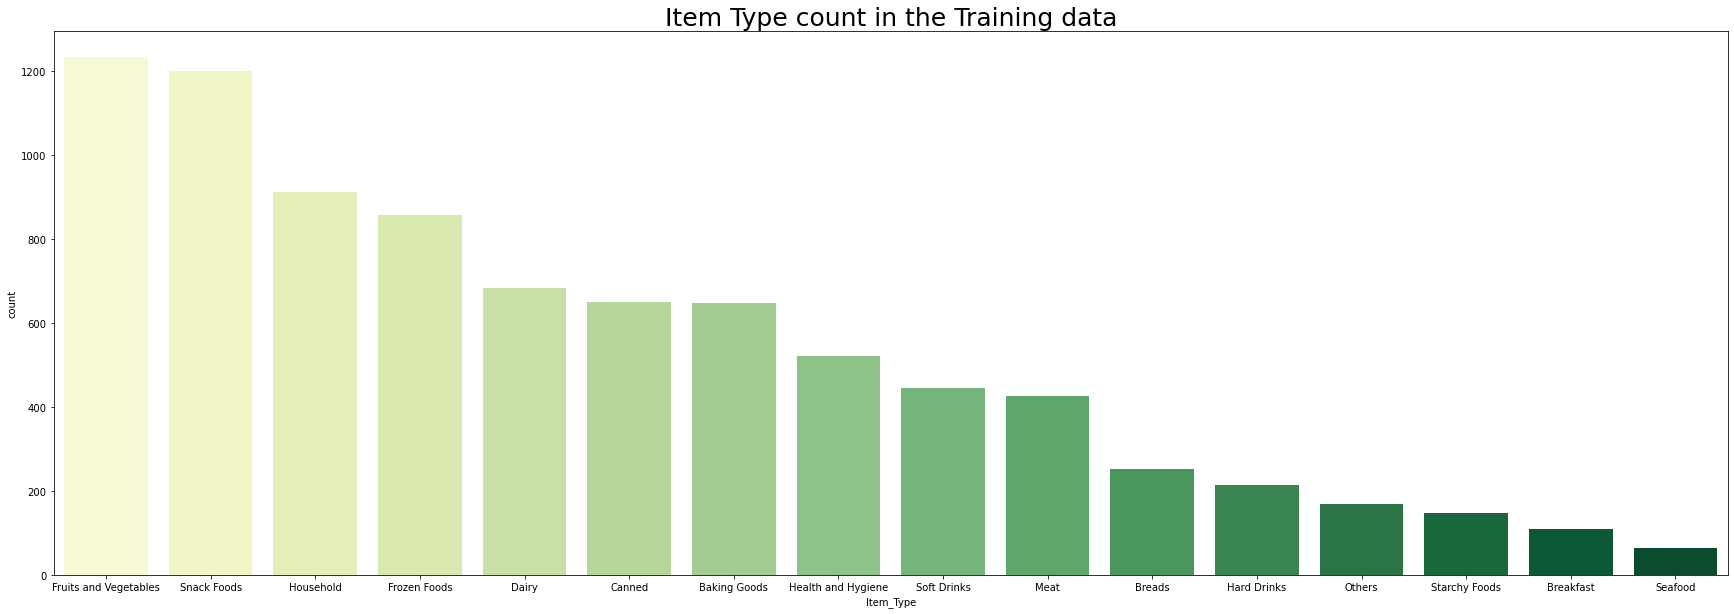

In [30]:
plt.figure(figsize=(30,10))
plt.title("Item Type count in the Training data", {"fontsize" : 25})
order = big_mart_train.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.countplot(x='Item_Type', data= big_mart_train, order = order, palette='YlGn');

Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

In [31]:
big_mart_train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

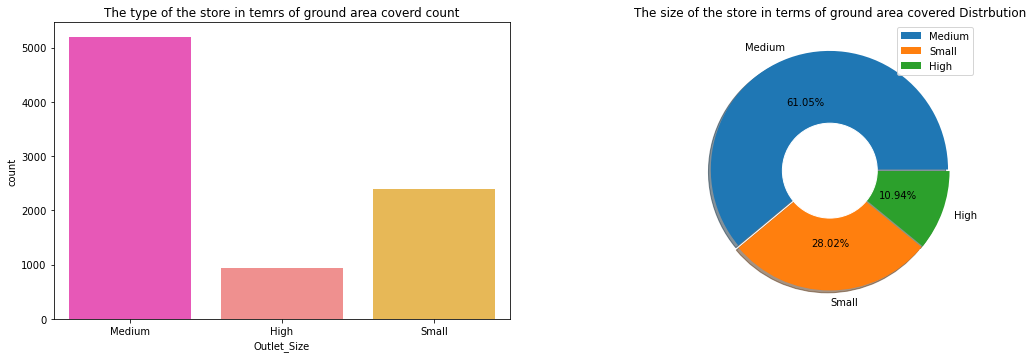

In [32]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.title("The type of the store in temrs of ground area coverd count")
sns.countplot(x="Outlet_Size", data=big_mart_train, palette='spring')

plt.subplot(2,2,2)
medium = big_mart_train.Outlet_Size[big_mart_train.Outlet_Size == 'Medium'].count()
small = big_mart_train.Outlet_Size[big_mart_train.Outlet_Size == 'Small'].count()
high = big_mart_train.Outlet_Size[big_mart_train.Outlet_Size == 'High'].count()
plt.title("The size of the store in terms of ground area covered Distrbution")
plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], autopct="%.2f%%", 
        shadow=True, explode=[0.01,0.01,0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

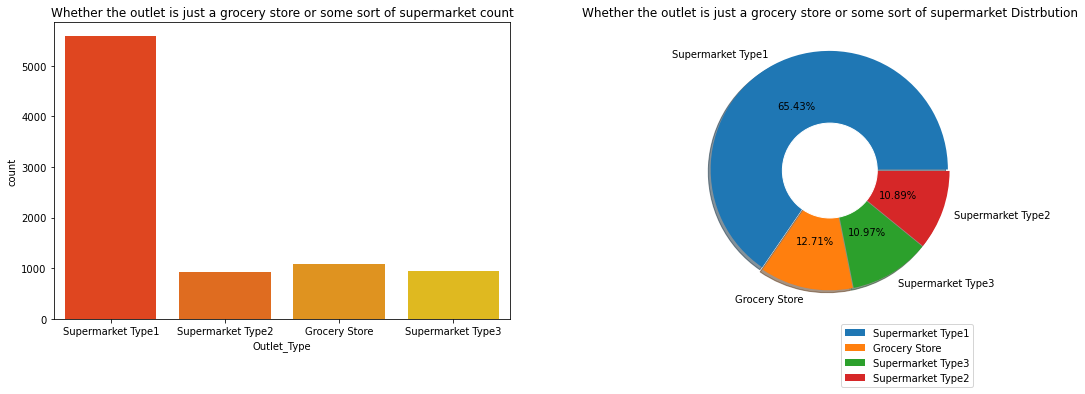

In [33]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Whether the outlet is just a grocery store or some sort of supermarket count")
sns.countplot(x='Outlet_Type', data=big_mart_train, palette='autumn')

plt.subplot(2,2,2)
sup_1 = big_mart_train.Outlet_Type[big_mart_train.Outlet_Type == 'Supermarket Type1'].count()
goc = big_mart_train.Outlet_Type[big_mart_train.Outlet_Type == 'Grocery Store'].count()
sup_3 = big_mart_train.Outlet_Type[big_mart_train.Outlet_Type == 'Supermarket Type3'].count()
sup_2 = big_mart_train.Outlet_Type[big_mart_train.Outlet_Type == 'Supermarket Type2'].count()
plt.title("Whether the outlet is just a grocery store or some sort of supermarket Distrbution")
plt.pie([sup_1, goc, sup_3, sup_2], labels=['Supermarket Type1', 'Grocery Store', 
                                            'Supermarket Type3', 'Supermarket Type2'], 
        autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01, 0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(1, 0))

plt.show()

In [34]:
FEATURES = [col for col in big_mart_train.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier']]
cat_features = [col for col in FEATURES if big_mart_train[col].nunique() < 10]
cont_features = [col for col in FEATURES if big_mart_train[col].nunique() >= 10]

In [35]:
cat_features

['Item_Fat_Content',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

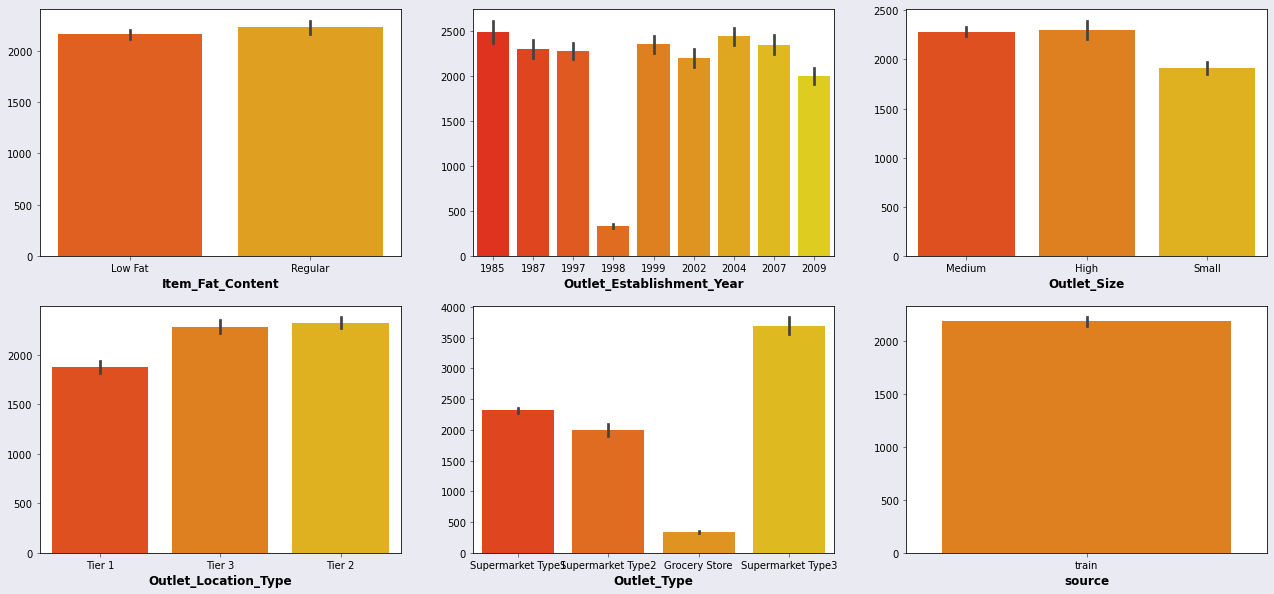

In [36]:
ncols = 3
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.barplot(y=big_mart_train['Item_Outlet_Sales'], x=big_mart_train[col], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

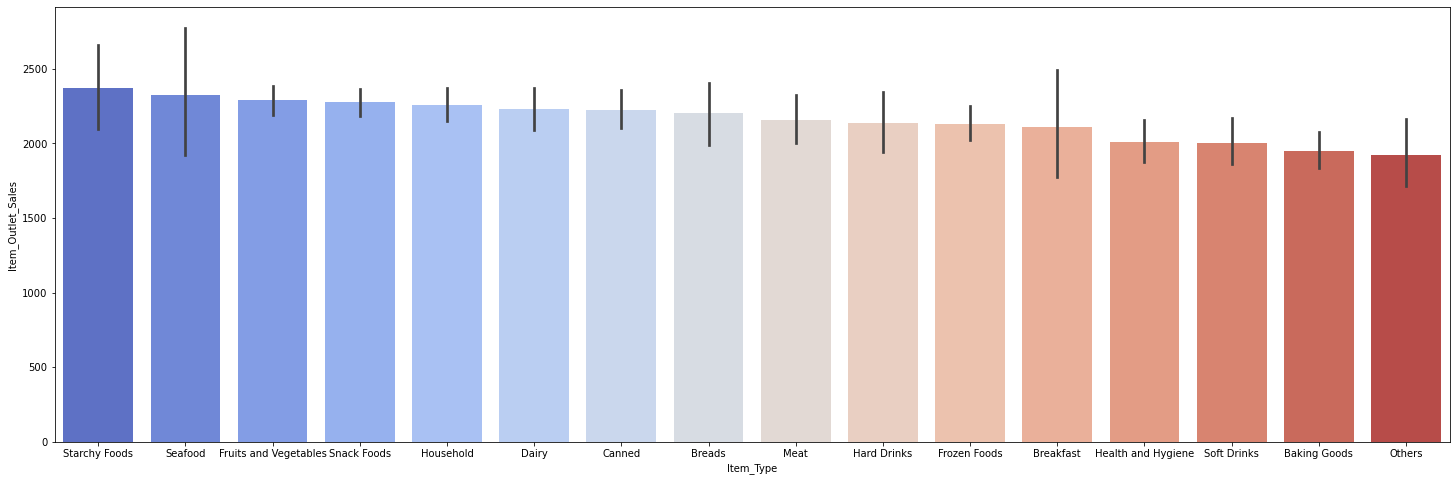

In [37]:
plt.figure(figsize=(25,8))

order=big_mart_train.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=big_mart_train,palette='coolwarm', order=order);

**The products availabe were Fruits-Veggies and Snac Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock products that are most bought by customers**

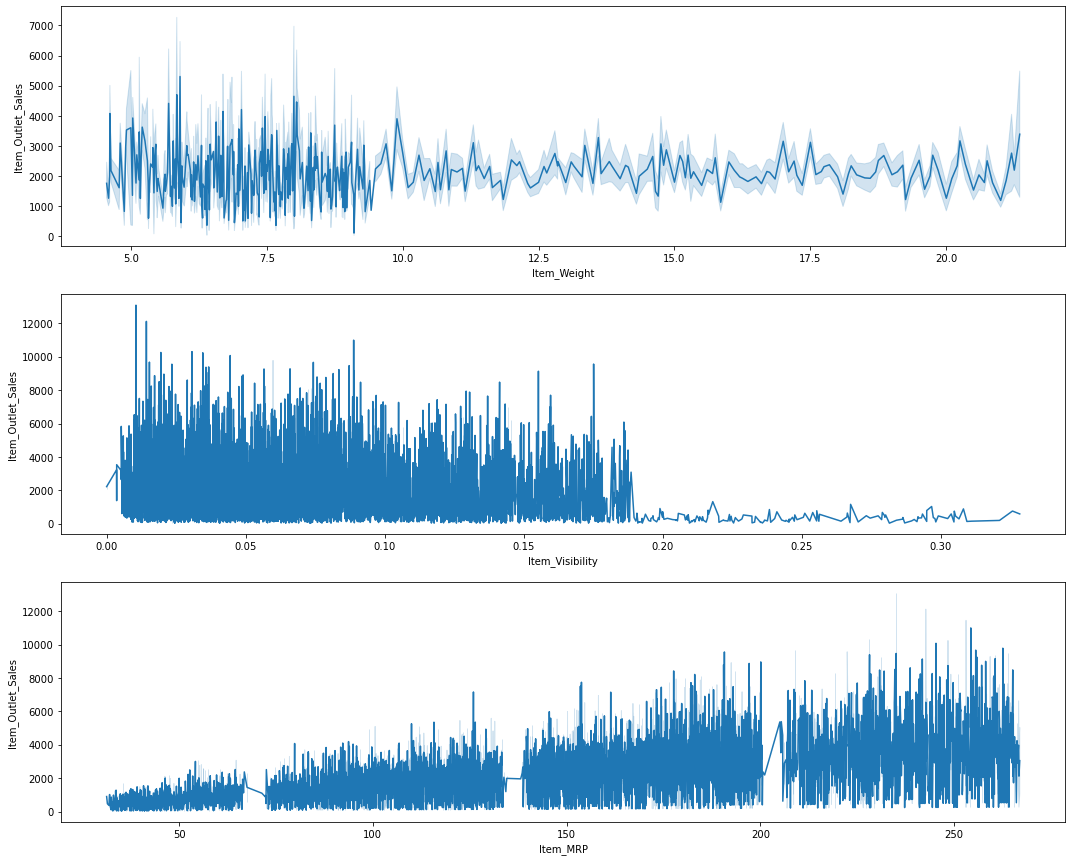

In [38]:
plt.figure(figsize=(18,15))
plt.subplot(3,1,1)
sns.lineplot(x='Item_Weight', y='Item_Outlet_Sales', data=big_mart_train);

plt.subplot(3,1,2)
sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=big_mart_train);

plt.subplot(3,1,3)
sns.lineplot(x='Item_MRP', y='Item_Outlet_Sales', data=big_mart_train);

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0. Items MRP ranging from 200-250 dollars is having high Sales.

C:\Users\uSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


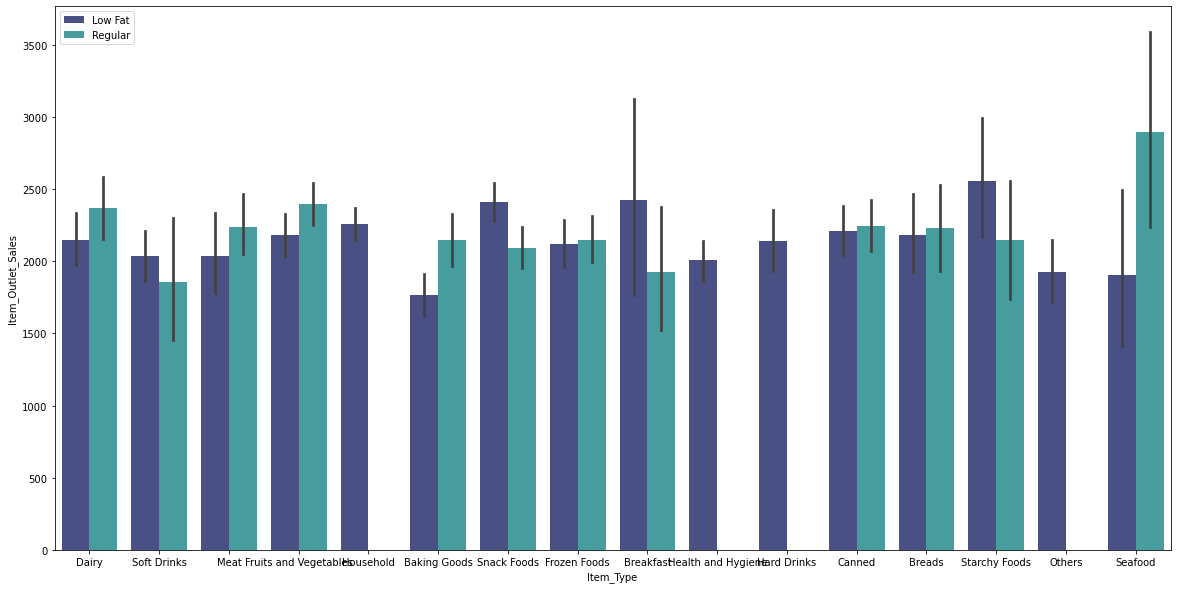

In [39]:
plt.figure(figsize=(20,10))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=big_mart_train,palette='mako')
plt.legend();

Seafood Regular is highest in price



C:\Users\uSer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


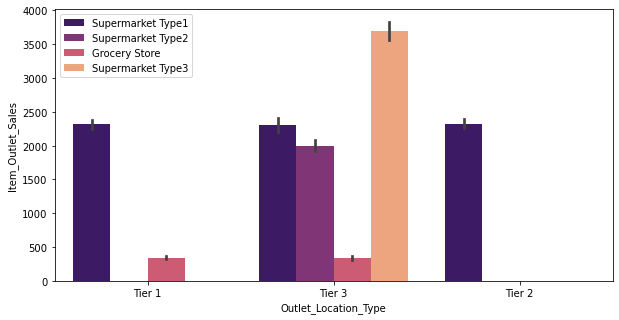

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=big_mart_train,palette='magma')
plt.legend()
plt.show()

## Data Modeling

In [41]:
big_mart_train['source']='train'
big_mart_test['source']='test'
data = pd.concat([big_mart_train, big_mart_test],ignore_index=True, sort=False)
# train.shape, test.shape, data.shape

In [42]:
# Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
# Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [43]:
# Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [44]:
# Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [45]:
# Import sklearn:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [46]:
# One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [47]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [48]:
# Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

# Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

# Export files as modified versions:
train.to_csv("Data/train_modified.csv",index=False)
test.to_csv("Data/test_modified.csv",index=False)

C:\Users\uSer\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28,...,FDH31,FDA01,FDH24,NCJ19,FDF53,FDF22,FDS36,NCJ29,FDN46,DRG01
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.857645,16.2,19.2,...,12.0,15.0,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Visibility,0.016047,0.019278,0.01676,0.0,0.0,0.0,0.012741,0.12747,0.016687,0.09445,...,0.020407,0.054489,0.021518,0.118661,0.083607,0.056783,0.046982,0.035186,0.145221,0.044878
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.7622,96.9726,187.8214,...,99.9042,57.5904,157.5288,58.7588,178.8318,214.5218,108.157,85.1224,103.1332,75.467
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013,OUT018,OUT013,OUT027,OUT045,OUT017,...,OUT035,OUT045,OUT018,OUT018,OUT046,OUT013,OUT045,OUT035,OUT018,OUT046
Item_Outlet_Sales,3735.138,443.4228,2097.27,732.38,994.7052,556.6088,343.5528,4022.7636,1076.5986,4710.535,...,595.2252,468.7232,1571.288,858.882,3608.636,2778.3834,549.285,1193.1136,1845.5976,765.67
Outlet_Years,14,4,14,15,26,4,26,28,11,6,...,9,11,4,4,16,26,11,9,4,16
Item_Fat_Content_0,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
Item_Fat_Content_1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
Item_Fat_Content_2,0,1,0,1,0,1,1,0,1,1,...,1,1,0,0,1,0,1,0,1,0


In [50]:
import findspark

In [51]:
findspark.init('/home/singha/Downloads/spark-3.2.1-bin-hadoop3.2')

In [52]:
import pyspark

In [53]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('BigMart').getOrCreate()

In [54]:
# spark

In [55]:
# from pyspark.ml.feature import VectorAssembler

# IDcol = ['Item_Identifier','Outlet_Identifier']

# train_all = train.drop(IDcol, axis=1)



# # Change pandas dataframe to spark dataframe
# train_all  = spark.createDataFrame(train_all.values.tolist(), list(train_all.columns))

# # Get feature columns'name
# feature_cols = train_all.columns
# feature_cols.remove('Item_Outlet_Sales')

# train_all.show(3)

# # Combine all feature columns to one
# vectorAssembler = VectorAssembler(inputCols = feature_cols, outputCol = 'features')
# train_all = vectorAssembler.transform(train_all)
# train_all = train_all.select(['features', 'Item_Outlet_Sales'])
# train_all.show(3)

# train_all.take(1)

In [56]:
# # Split train data and test data
# splits = train_all.randomSplit([0.7, 0.3])
# train_df = splits[0]
# test_df = splits[1]

In [57]:
# # Linear Regression Model
# from pyspark.ml.regression import LinearRegression
# from pyspark.ml.evaluation import RegressionEvaluator

# lr = LinearRegression(featuresCol= 'features', labelCol='Item_Outlet_Sales', maxIter=100, regParam=0.0,
#                       elasticNetParam=0.0)

# lr_model = lr.fit(train_df)

# trainingSummary = lr_model.summary
# print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
# print("R2: %f" % trainingSummary.r2)

# # Predict and Evaluate
# lr_predictions = lr_model.transform(test_df)
# lr_predictions.select("prediction", "Item_Outlet_Sales", "features").show(5)

# lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Item_Outlet_Sales", metricName="rmse")
# print("Root Mean Square Error (RMSE) on test data = %g" % lr_evaluator.evaluate(lr_predictions))


# lr_evaluator_r2  = RegressionEvaluator(predictionCol="prediction", labelCol="Item_Outlet_Sales", metricName="rmse")
# print("Root Mean Square Error (RMSE) on test data = %g" % lr_evaluator_r2.evaluate(lr_predictions))

# coef1 = pd.Series(lr_model.coefficients, feature_cols).sort_values()
# coef1.plot(kind='bar', title='Linear Regression Model Coefficients')


In [58]:
# # Decision Tree Regression Model
# from pyspark.ml.regression import DecisionTreeRegressor

# dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='Item_Outlet_Sales', maxDepth=15, minInstancesPerNode=100)
# dt_model = dt.fit(train_df)

# # Predict and Evaluate
# dt_predictions = dt_model.transform(test_df)
# dt_predictions.select("prediction","Item_Outlet_Sales","features").show(5)

# df_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Item_Outlet_Sales",metricName="rmse")
# print("Root Mean Square Error (RMSE) on test data = %g" % df_evaluator.evaluate(dt_predictions))

# df_evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Item_Outlet_Sales",metricName="r2")
# print("R Squared (R2) on test data = %g" % df_evaluator_r2.evaluate(dt_predictions))




In [59]:
# from pyspark.ml.regression import RandomForestRegressor
# # CrossValidation
# from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# rf = RandomForestRegressor(featuresCol = 'features', labelCol='Item_Outlet_Sales', minInstancesPerNode=100)

# rf_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Item_Outlet_Sales",metricName="rmse")

# paramGrid = ParamGridBuilder() \
#     .addGrid(rf.maxDepth, [5, 6, 10]) \
#     .addGrid(rf.numTrees, [200, 400]) \
#     .build()

# cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=rf_evaluator, numFolds=5, parallelism=5)

# cv_model = cv.fit(train_df)

# rf_predictions = cv_model.transform(test_df)
# rf_predictions.select("prediction","Item_Outlet_Sales","features").show(5)



In [60]:

# print("Root Mean Square Error (RMSE) on test data = %g" % gbt_evaluator.evaluate(gbt_predictions))

# rf_evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="Item_Outlet_Sales",metricName="r2")
# print("R Squared (R2) on test data = %g" % rf_evaluator_r2.evaluate(rf_predictions))
